# **Question 4**

**Discrete time**

Convolution

a)

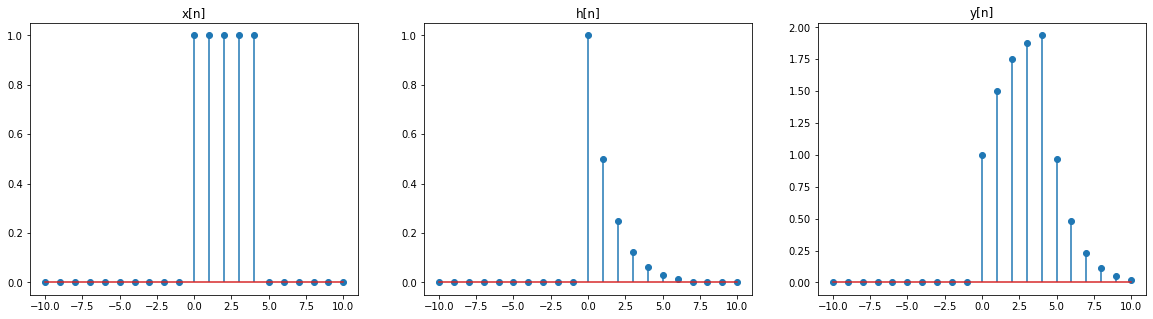

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math

def unit_step(u, n):
  unit = []
  for i in n:
    if (i < u):
      unit.append(0)
    if (i >= u):
      unit.append(1)
  return unit

def h_func(n):
  h = []
  for i in n:
    if i < 0 or i > 6:
      h.append(0)
    else:
      h.append(0.5 ** i)
  return h

n = np.arange(-10, 11, 1)
unit0 = unit_step(0, n)
unit5 = unit_step(5, n)

x = list(np.subtract(unit0, unit5))
h = list(h_func(n))

def my_convolution(x, h, n):
  y = []
  for i in range(0, len(n)):
    sum = 0
    for k in range(0, len(n)):
      if i-k >= 0:
        if x[k] != 0 or h[k] != 0:
          sum += (x[k]*h[i-k+10])
    y.append(sum)
  return y

my_y = my_convolution(x, h, n)
fig , axes0 = plt.subplots(1, 3, figsize=(20, 5))

axes0[0].stem(n, x, use_line_collection=True)
axes0[0].title.set_text("x[n]")

axes0[1].stem(n, h, use_line_collection=True)
axes0[1].title.set_text("h[n]")

axes0[2].stem(n, my_y, use_line_collection=True)
axes0[2].title.set_text("y[n]")

b)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       1.       1.5      1.75     1.875
 1.9375   0.96875  0.484375 0.234375 0.109375 0.046875 0.015625 0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.      ]


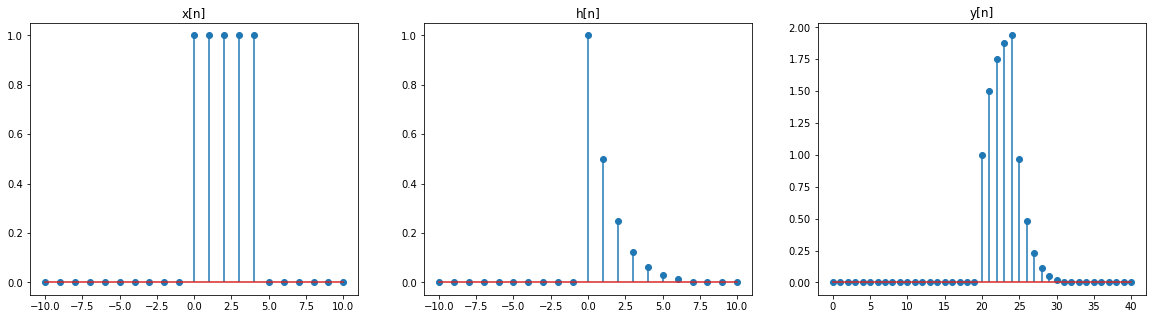

In [215]:

y = signal.convolve(x, h)
print(y)
fig , axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].stem(n, x, use_line_collection=True)
axes[0].title.set_text("x[n]")

axes[1].stem(n, h, use_line_collection=True)
axes[1].title.set_text("h[n]")

axes[2].stem(y, use_line_collection=True)
axes[2].title.set_text("y[n]")




c)

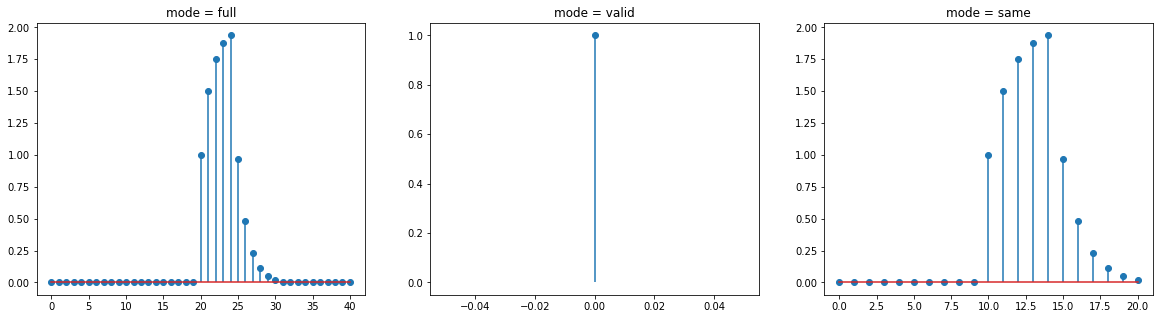

In [184]:
y_ = [0, 0 ,0]
y_[0] = signal.convolve(x, h, mode = 'full')
y_[1] = signal.convolve(x, h, mode = 'valid')
y_[2] = signal.convolve(x, h, mode = 'same')


fig , axes1 = plt.subplots(1, 3, figsize=(20, 5))
titles = ["mode = full", "mode = valid", "mode = same"]

for i in range (0, 3):
  axes1[i].title.set_text(titles[i])
  axes1[i].stem(y_[i], use_line_collection=True)


Deconvolution

a)

b)

c)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


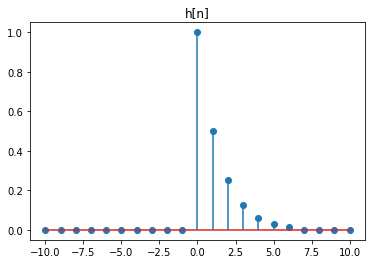

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0.]


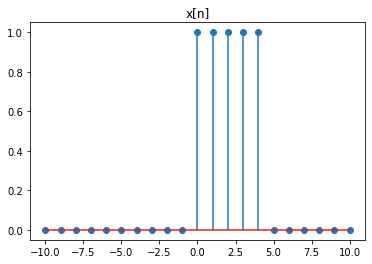

In [214]:
h_new , er = signal.deconvolve(y, x[10:])
print(h_new)
plt.stem(n, h_new[10:], use_line_collection=True)
plt.title('h[n]')
plt.show()

x_new , er= signal.deconvolve(y, h[10:])
print(x_new)
plt.stem(n, x_new[10:], use_line_collection=True)
plt.title('x[n]');

**Continuous time**

1.

a)

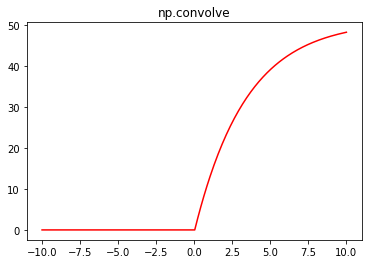

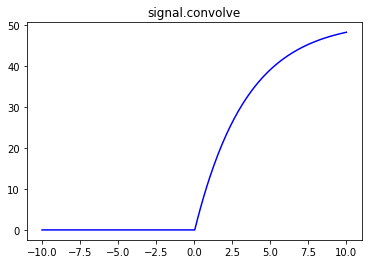

In [209]:
import random

a = random.uniform(0, 1)
def x_(t, a):
  res = []
  for i in t:
    if i < 0:
      res.append(0)
    else:
      res.append(np.exp(-1 * a * i))

  return res

t = np.linspace(-10, 10, 300)
h_ = unit_step(0, t)

y__t = [0, 0]
y__t[0] = signal.convolve(x_(t, a), h_, mode = 'same')
y__t[1] = np.convolve(x_(t, a), h_, mode = 'same')

plt.plot(t, y__t[0], 'r')
plt.title("np.convolve")
plt.show();

plt.plot(t, y__t[0], 'b')
plt.title("signal.convolve")
plt.show();


In [ ]:
b)

2)

a)

b)

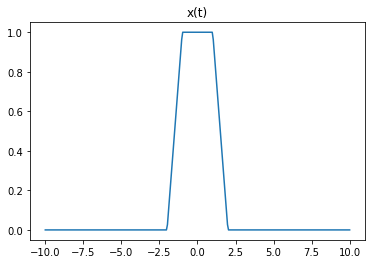

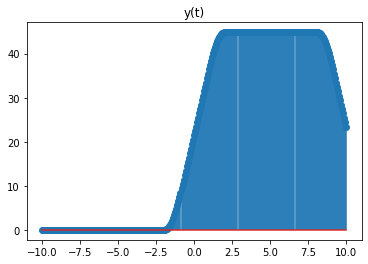

In [210]:
def func_x_t(t):
  x_t =[]
  for i in t:
    x_t.append(np.piecewise(i, [i<-2, -2<i<-1, -1<i<1, 1<i<2, i>2], [0, i+2, 1, -i+2, 0]))
  return x_t

x_t = func_x_t(t)
plt.plot(t, x_t);
plt.title("x(t)")
plt.show();
h_t = unit_step(0, t)

y_t3 = signal.convolve(x_t, h_t, mode = 'same')
plt.stem(t, y_t3, use_line_collection=True);
plt.title("y(t)")
plt.show();


3.

a)

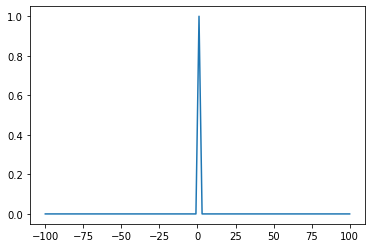

In [219]:
T = 100
t = np.linspace(-100, 100, 100)

impulse_ = signal.unit_impulse(T, 'mid')
plt.plot(t, impulse_)
plt.show()

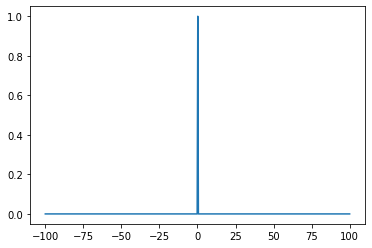

In [221]:
T = 500
t = np.linspace(-100, 100, 500)

impulse_ = signal.unit_impulse(T, 'mid')
plt.plot(t, impulse_)
plt.show()

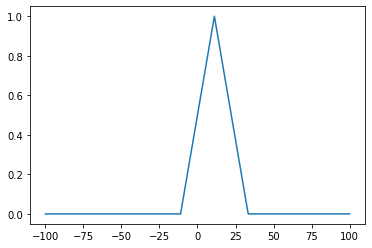

In [222]:
T = 10
t = np.linspace(-100, 100, 10)

impulse_ = signal.unit_impulse(T, 'mid')
plt.plot(t, impulse_)
plt.show()